In [111]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.feature import canny
from skimage.filters import roberts, sobel, threshold_otsu, threshold_local, gaussian
from skimage.transform import hough_ellipse, hough_circle, hough_circle_peaks
from skimage.draw import ellipse_perimeter, circle_perimeter
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening, watershed, square
from skimage.measure import label, regionprops

from scipy import ndimage as ndi

In [47]:
names = ['C1-MAX_MA NR C3.png', 'C2-MAX_MA NR C3.png']
images = [(io.imread(name, as_gray = True) * 255).astype(int).astype(float) for name in names]

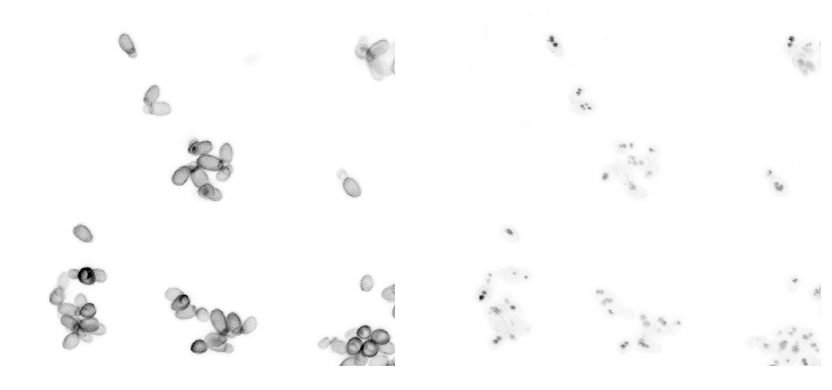

In [48]:
n = 7

fig, axes = plt.subplots(1, 2, figsize = (2 * n, n))

for i in range(2):
    axes[i].imshow(images[i], cmap = 'Greys')
    axes[i].set_axis_off()

In [72]:
blurred = gaussian(images[0], sigma = 3)

edges = sobel(blurred)

# edges = gaussian(edges, sigma = 2)

local_thresh = threshold_otsu(edges)
binary = (edges > local_thresh) * 1

m = 3

dilatated = binary_dilation(binary, square(m))
eroded = binary_erosion(binary, square(m))

opened = binary_opening(binary, square(m))
closed = binary_closing(binary, square(m))

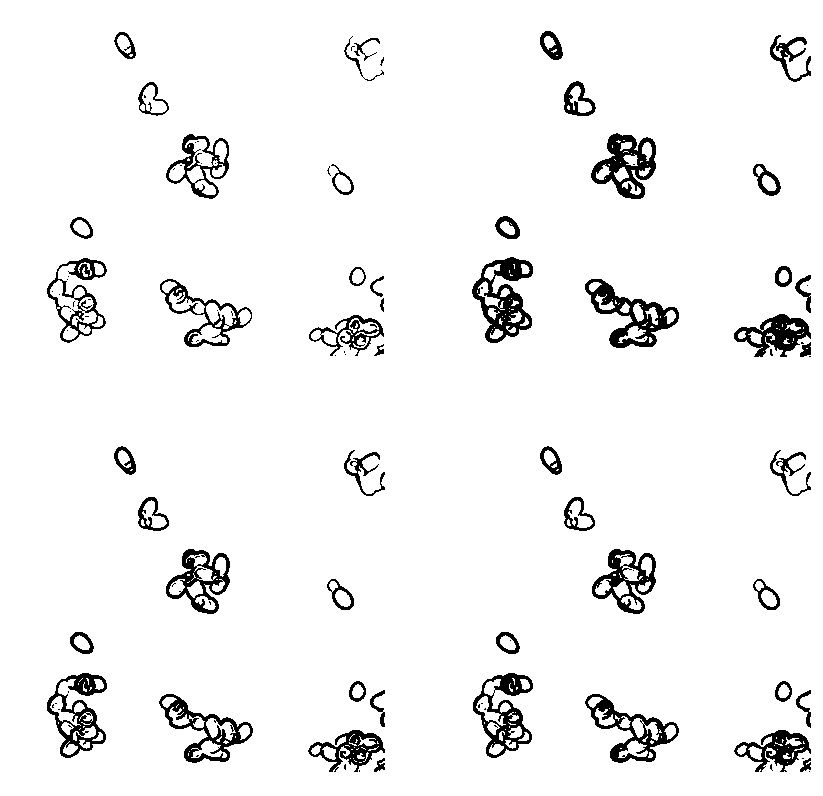

In [73]:
fig, axes = plt.subplots(2, 2, figsize = (2 * n, 2 * n))
axes[0, 0].imshow(eroded, cmap = 'Greys')
axes[0, 1].imshow(dilatated, cmap = 'Greys')

axes[1, 0].imshow(opened, cmap = 'Greys')
axes[1, 1].imshow(closed, cmap = 'Greys')

for i in range(2):
    axes[i, 0].set_axis_off()
    axes[i, 1].set_axis_off()

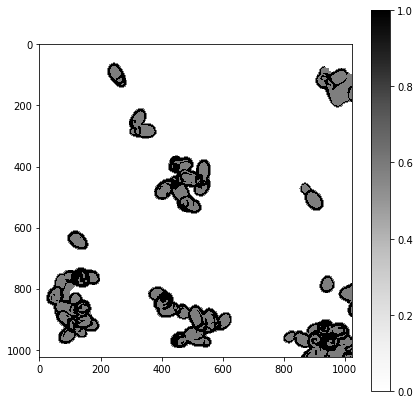

In [74]:
# fill_coins = ndi.binary_fill_holes(fill_coins)
# plt.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')

# elevation_map = sobel(images[0])
elevation_map = opened
markers = np.zeros_like(images[0])

markers[images[0] < 1] = 1
markers[images[0] > 10] = 2

regions = watershed(elevation_map, markers) - 1
regions = ndi.binary_fill_holes(regions) * 1

fig, ax = plt.subplots(figsize = (n, n))

r = ax.imshow(regions, cmap = 'Greys')
ax.imshow(closed, cmap = 'Greys', alpha = 0.5)

plt.colorbar(r)

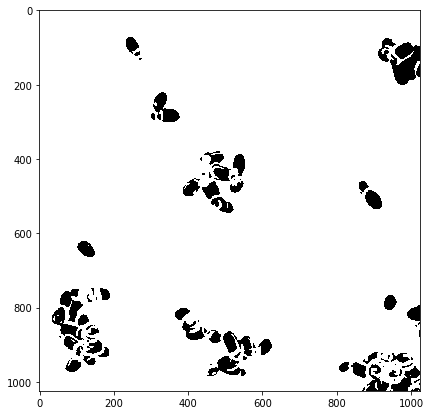

In [118]:
splitted = regions - closed
splitted[splitted <= 0] = 0

# splitted = binary_dilation(splitted, square(m))
# splitted = binary_erosion(splitted, square(m))

fig, ax = plt.subplots(figsize = (n, n))
a = ax.imshow(splitted, cmap = 'Greys')

In [119]:
labels = label(splitted, connectivity = 1)

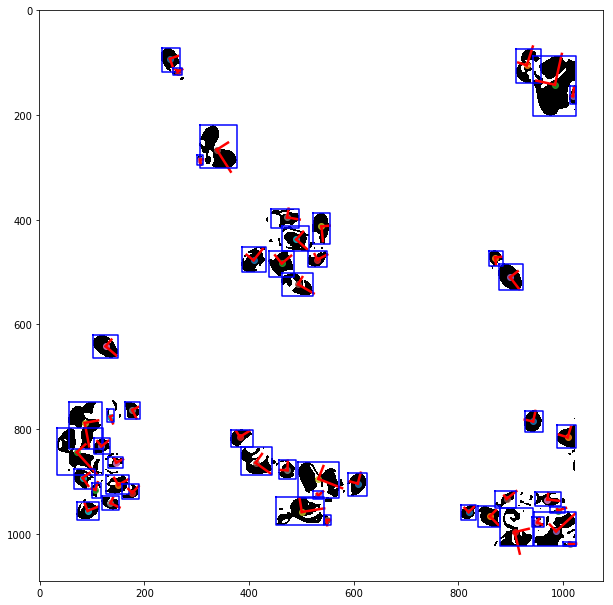

In [132]:
fig, ax = plt.subplots(figsize = (1.5 * n, 1.5 * n))

plt.imshow(splitted, cmap = 'Greys')

for region in regionprops(labels, coordinates = 'xy'):
    if region.area >= 100: # take regions with large enough areas
        minr, minc, maxr, maxc = region.bbox # draw rectangle around segmented coins
        y0, x0 = region.centroid
        theta = region.orientation
        
        major = region.major_axis_length
        minor = region.minor_axis_length
        
        x1 = x0 + np.cos(theta) * 0.5 * major
        y1 = y0 - np.sin(theta) * 0.5 * major
        x2 = x0 - np.sin(theta) * 0.5 * minor
        y2 = y0 - np.cos(theta) * 0.5 * minor
        
        plt.scatter(x0, y0, alpha = 0.8)
        ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
        ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
        
        minr, minc, maxr, maxc = region.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        ax.plot(bx, by, '-b', linewidth = 1.5)

# LipidDroplets

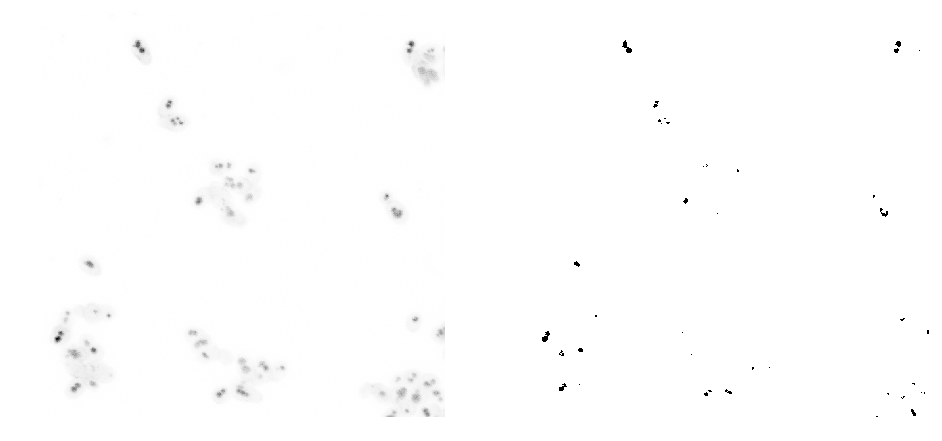

In [239]:
binary_local = images[1] > 0.3 * 255

n = 8

fig, axes = plt.subplots(1, 2, figsize = (2 * n, n))

axes[0].imshow(images[1], cmap = 'Greys')
axes[1].imshow(binary_local, cmap = 'Greys')

for i in range(2):
    axes[i].set_axis_off()